# groupby 연습

- 파이썬으로 테이블 다루기
- 데이터 프레임 시각화 연습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from numpy.random import choice

## 판매 데이터 생성

In [2]:
year = choice(np.arange(2016,2021),30)
year

array([2019, 2018, 2017, 2016, 2020, 2018, 2017, 2017, 2017, 2016, 2019,
       2017, 2016, 2020, 2017, 2016, 2018, 2018, 2017, 2018, 2017, 2020,
       2017, 2018, 2019, 2020, 2020, 2020, 2019, 2019])

In [3]:
item = choice(("A", "B", "C"),30); item

array(['A', 'A', 'C', 'A', 'C', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'B', 'C', 'C', 'B', 'B', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C',
       'C', 'B', 'C', 'C'], dtype='<U1')

In [4]:
no = choice(np.arange(3,9),30)
price = choice(np.arange(20,50,10),30)

df = pd.DataFrame({"year":year, "item":item, "no":no,  'price':price})
df

,year,item,no,price
0,2019,A,7,40
1,2018,A,4,20
2,2017,C,4,40
3,2016,A,4,20
4,2020,C,8,40
5,2018,B,5,30
6,2017,A,4,40
7,2017,A,5,30
8,2017,A,7,40
9,2016,A,3,20


In [5]:
df_year =  df.groupby("year")
df_year

In [6]:
df_year.ngroups # 그룹 수

5

In [7]:
df_year.groups # 그룹에 속한 인덱스 보기

{2016: [3, 9, 12, 15], 2017: [2, 6, 7, 8, 11, 14, 18, 20, 22], 2018: [1, 5, 16, 17, 19, 23], 2019: [0, 10, 24, 28, 29], 2020: [4, 13, 21, 25, 26, 27]}

In [8]:
df_year.size()

year
2016    4
2017    9
2018    6
2019    5
2020    6
dtype: int64

In [9]:
df_year.count()

,item,no,price
year,,,
2016,4,4,4
2017,9,9,9
2018,6,6,6
2019,5,5,5
2020,6,6,6


In [10]:
df_year.get_group(2019)

,year,item,no,price
0,2019,A,7,40
10,2019,A,6,40
24,2019,B,6,30
28,2019,C,6,20
29,2019,C,6,30


In [11]:
df

,year,item,no,price
0,2019,A,7,40
1,2018,A,4,20
2,2017,C,4,40
3,2016,A,4,20
4,2020,C,8,40
5,2018,B,5,30
6,2017,A,4,40
7,2017,A,5,30
8,2017,A,7,40
9,2016,A,3,20


In [12]:
for item, group in df.groupby('item'):
    group.to_csv(item + '.csv')
    print(item)
    print(group)
    print(group['no'].mean())

A
    year item  no  price
0   2019    A   7     40
1   2018    A   4     20
3   2016    A   4     20
6   2017    A   4     40
7   2017    A   5     30
8   2017    A   7     40
9   2016    A   3     20
10  2019    A   6     40
11  2017    A   8     30
12  2016    A   4     20
20  2017    A   7     20
23  2018    A   4     20
5.25
B
    year item  no  price
5   2018    B   5     30
13  2020    B   5     20
16  2018    B   3     30
17  2018    B   4     30
18  2017    B   7     20
21  2020    B   5     30
24  2019    B   6     30
27  2020    B   6     20
5.125
C
    year item  no  price
2   2017    C   4     40
4   2020    C   8     40
14  2017    C   7     40
15  2016    C   8     30
19  2018    C   4     40
22  2017    C   4     40
25  2020    C   8     40
26  2020    C   8     20
28  2019    C   6     20
29  2019    C   6     30
6.3


In [13]:
!cat B.csv

,year,item,no,price
5,2018,B,5,30
13,2020,B,5,20
16,2018,B,3,30
17,2018,B,4,30
18,2017,B,7,20
21,2020,B,5,30
24,2019,B,6,30
27,2020,B,6,20


In [14]:
df_year.no.aggregate(['max', 'min', 'count', 'median', 'mean', 'size','std'])

,max,min,count,median,mean,size,std
year,,,,,,,
2016,8,3,4,4,4.750000,4,2.217356
2017,8,4,9,7,5.888889,9,1.615893
2018,5,3,6,4,4.000000,6,0.632456
2019,7,6,5,6,6.200000,5,0.447214
2020,8,5,6,7,6.666667,6,1.505545


In [15]:
def big_sale(x):
    m = x.mean()
    
    return True if m > 3 else False
df_year.no.agg(['max', 'mean',  big_sale])

,max,mean,big_sale
year,,,
2016,8,4.750000,True
2017,8,5.888889,True
2018,5,4.000000,True
2019,7,6.200000,True
2020,8,6.666667,True


In [16]:
df_year.no.max()

year
2016    8
2017    8
2018    5
2019    7
2020    8
Name: no, dtype: int64

In [17]:
df_year.mean() # 모든 수치형 컬럼에 적용된다

,no,price
year,,
2016,4.750000,22.500000
2017,5.888889,33.333333
2018,4.000000,28.333333
2019,6.200000,32.000000
2020,6.666667,28.333333


## 트랜스폼
- apply()와 유사하다

In [18]:
standardization = lambda x: (x - x.mean()) / x.std()
# 데이터프레임에 시리즈를 대상으로 apply() 수행하는 것과 유하
df_year.no.transform(standardization)

0     1.788854
1     0.000000
2    -1.168944
3    -0.338241
4     0.885615
5     1.581139
6    -1.168944
7    -0.550091
8     0.687614
9    -0.789228
10   -0.447214
11    1.306467
12   -0.338241
13   -1.107019
14    0.687614
15    1.465710
16   -1.581139
17    0.000000
18    0.687614
19    0.000000
20    0.687614
21   -1.107019
22   -1.168944
23    0.000000
24   -0.447214
25    0.885615
26    0.885615
27   -0.442807
28   -0.447214
29   -0.447214
Name: no, dtype: float64

## 필터
- 조건에 맞는 샘플만 얻는다

In [19]:
df

,year,item,no,price
0,2019,A,7,40
1,2018,A,4,20
2,2017,C,4,40
3,2016,A,4,20
4,2020,C,8,40
5,2018,B,5,30
6,2017,A,4,40
7,2017,A,5,30
8,2017,A,7,40
9,2016,A,3,20


In [20]:
df.groupby('item').groups

{'A': [0, 1, 3, 6, 7, 8, 9, 10, 11, 12, 20, 23], 'B': [5, 13, 16, 17, 18, 21, 24, 27], 'C': [2, 4, 14, 15, 19, 22, 25, 26, 28, 29]}

In [21]:
df.groupby('item').filter(lambda x: len(x) > 8 )

,year,item,no,price
0,2019,A,7,40
1,2018,A,4,20
2,2017,C,4,40
3,2016,A,4,20
4,2020,C,8,40
6,2017,A,4,40
7,2017,A,5,30
8,2017,A,7,40
9,2016,A,3,20
10,2019,A,6,40


##  이중 그루핑
- 인덱스를 이중으로

In [22]:
df.groupby(['year','item']).sum()

no  price
year item           
2016 A     11     60
     C      8     30
2017 A     31    160
     B      7     20
     C     15    120
2018 A      8     40
     B     12     90
     C      4     40
2019 A     13     80
     B      6     30
     C     12     50
2020 B     16     70
     C     24    100

In [23]:
df1 = df.groupby(['item','year']).sum(); df1

no  price
item year           
A    2016  11     60
     2017  31    160
     2018   8     40
     2019  13     80
B    2017   7     20
     2018  12     90
     2019   6     30
     2020  16     70
C    2016   8     30
     2017  15    120
     2018   4     40
     2019  12     50
     2020  24    100

In [24]:
df1["total"] = df1.no*df1.price
df1

no  price  total
item year                  
A    2016  11     60    660
     2017  31    160   4960
     2018   8     40    320
     2019  13     80   1040
B    2017   7     20    140
     2018  12     90   1080
     2019   6     30    180
     2020  16     70   1120
C    2016   8     30    240
     2017  15    120   1800
     2018   4     40    160
     2019  12     50    600
     2020  24    100   2400

In [25]:
df2 = df.groupby(['year','item']).sum().reset_index(level='item'); df2

,item,no,price
year,,,
2016,A,11,60
2016,C,8,30
2017,A,31,160
2017,B,7,20
2017,C,15,120
2018,A,8,40
2018,B,12,90
2018,C,4,40
2019,A,13,80


<AxesSubplot:xlabel='item,year'>

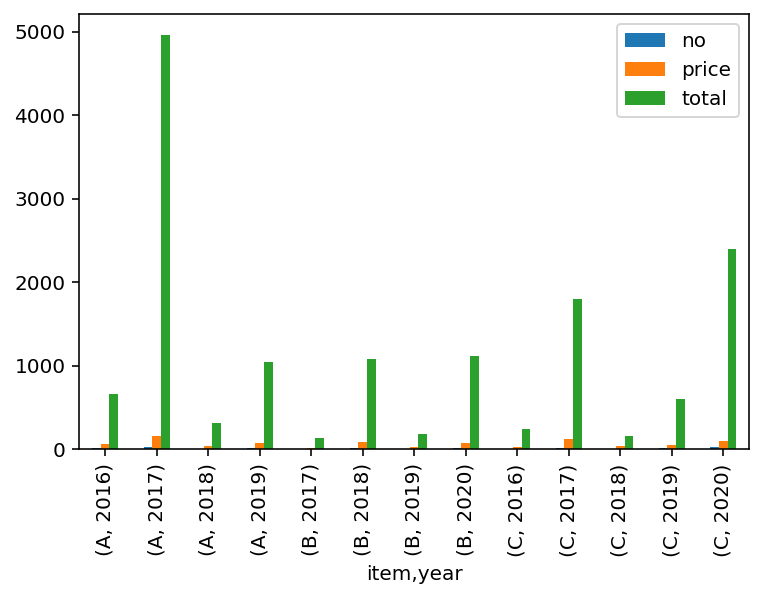

In [26]:
df1.plot.bar()

array([<AxesSubplot:title={'center':'no'}, xlabel='item,year'>,
       <AxesSubplot:title={'center':'price'}, xlabel='item,year'>,
       <AxesSubplot:title={'center':'total'}, xlabel='item,year'>],
      dtype=object)

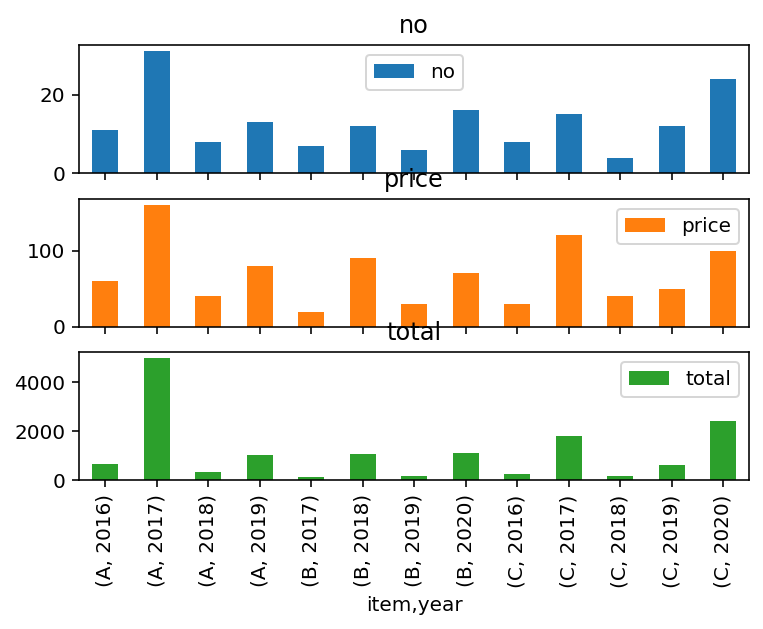

In [27]:
df1.plot.bar(subplots=True)

<AxesSubplot:xlabel='item'>

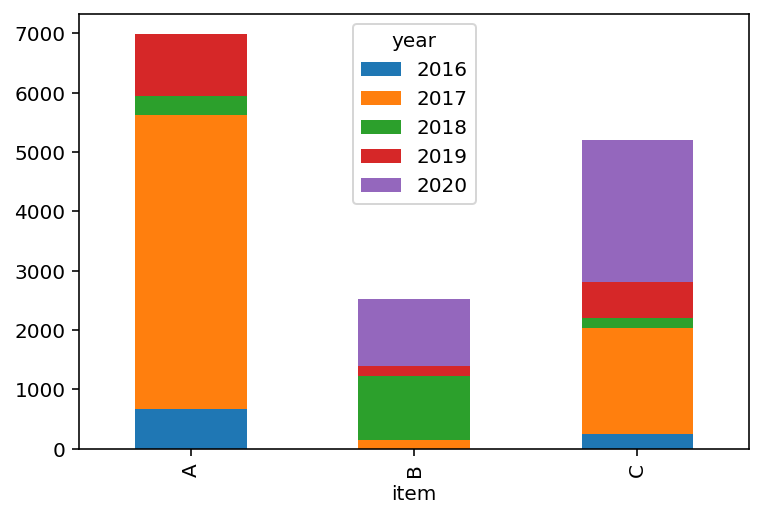

In [28]:
df1.total.unstack(level='year').plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='year'>

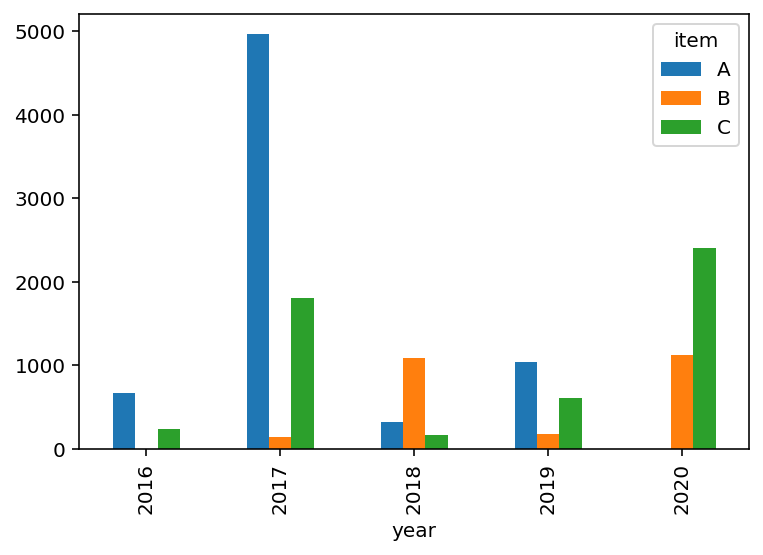

In [29]:
df1.total.unstack(level='item').plot(kind='bar')

## 면적 그래프

<AxesSubplot:xlabel='year'>

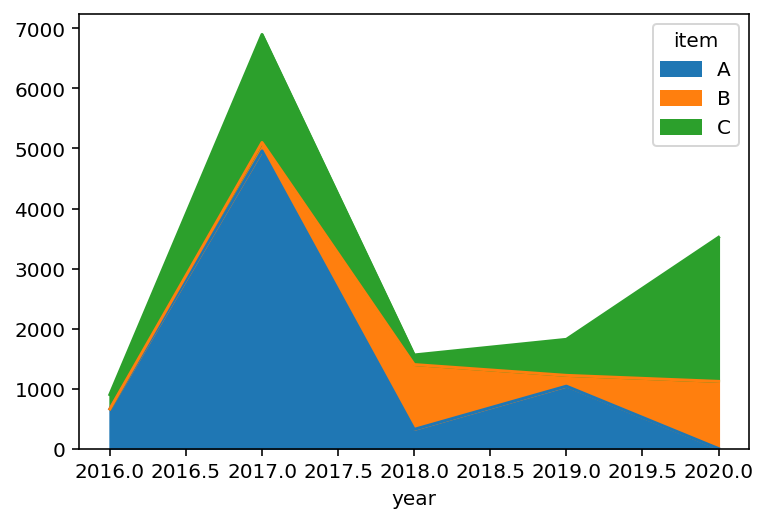

In [30]:
df1.total.unstack(level='item').plot.area()

# 버블 차트

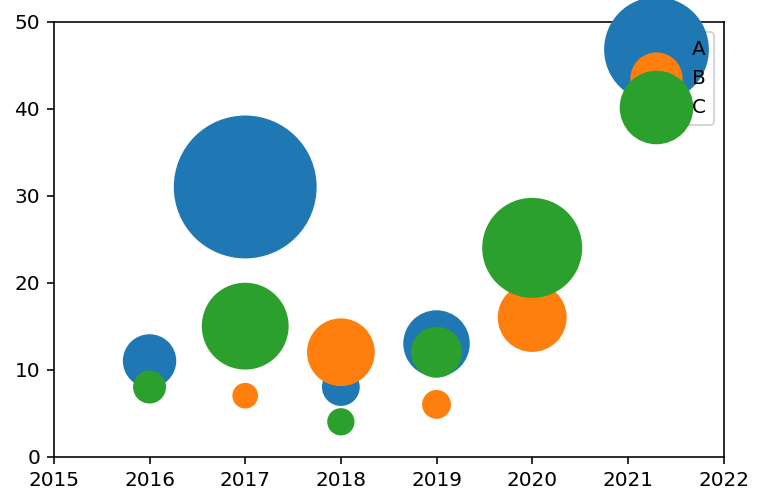

In [35]:
plt.xlim(2015,2022)
plt.ylim(0,50)
for item in ["A", "B", "C"]:
    df3 = df1.loc[item]
    plt.scatter(df3.index, df3.no, s=df3.total, label=item)
plt.legend()


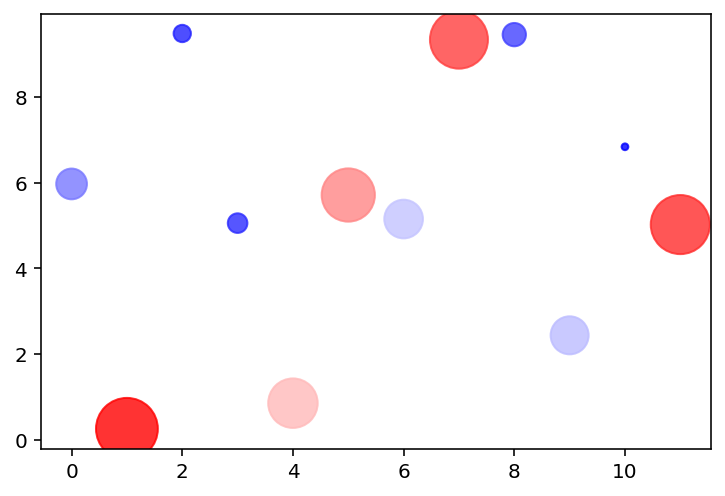

In [32]:
amount = np.random.rand(12)
size = amount*1000
y = np.random.rand(12)*10
plt.scatter(range(12), y,  s=size, c=amount, cmap='bwr', alpha=0.8)